/data/dotfiles_xy/nvim/plugged/tutorials/beginner_source/nlp/word_embeddings_tutorial.py 

In [1]:
at

'%load_ext autoreload \n %autoreload 2'

In [10]:
#### import and reading data
import pandas as pd
import numpy as np
import random
import torch.nn as nn
import torch.optim as optim
import torch
import gc
from funtest.test_pathlib import first_try
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(2018)
%matplotlib inline
import sys
# sys.path.append('/opt/playground/web_traffic/')
# from util import threed_view
# from threed_view import *# from util import threed_view
sys.path.append('/opt/playground/diaodu/')
from dst import *
from model import *
sys.path.append('/opt/playground/diaodu/util')
from gen_expand import *
from threed_view import *

base='/mnt/osstb/tianchi/diaodu/'

fn=first_try(base,'*.csv')

col_li_aid='aid_cpu_mem_disk_p_m_pm'
col_li_mid='mid_cpu_mem_disk_p_m_pm'
col_li_aid=col_li_aid.split('_')
col_li_mid=col_li_mid.split('_')

In [11]:
df_app_inter=pd.read_csv(fn[0],names=['aid','bid','v'],usecols=None,index_col=None)

df_app_res=pd.read_csv(fn[1],names=list('abcdefg'))

df_app_res=pd.read_csv(fn[1],names=col_li_aid)

df_ins=pd.read_csv(fn[2],names=['iid','aid','mid'])

df_machine=pd.read_csv(fn[3],names=col_li_mid)

df_su=pd.read_csv(fn[4])

In [4]:
import random
torch.manual_seed(random.randint(1,2888))

In [43]:
# df_app_inter=pd.read_csv(fn[0],names=['aid','bid','v'],nrows=1000,usecols=None,index_col=None)
# df_app_res=pd.read_csv(fn[1],names=list('abcdefg'),nrows=1000)
# df_app_res=pd.read_csv(fn[1],names=col_li_aid,nrows=1000)
# df_ins=pd.read_csv(fn[2],names=['iid','aid','mid'],nrows=1000)
# df_machine=pd.read_csv(fn[3],names=col_li_mid,nrows=1000)

In [4]:
df_app_res.head()

,aid,cpu,msem,disk,p,m,pm
0,app_1,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,6.42160797119|6.42160797119|6.42160797119|6.42...,60,0,0,0
1,app_2,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,60,0,0,0
2,app_3,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.73516845703|4.77767562866|4.73485565186|4.74...,60,0,0,0
3,app_4,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1....,60,0,0,0
4,app_5,0.5|0.5|0.501|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|...,4.84781265259|4.83489227295|4.83531951904|5.37...,60,0,0,0


#### p_m_pm

In [5]:
df_app_res.m.value_counts()

0    9338
Name: m, dtype: int64

In [6]:
df_app_res.p.value_counts()

0    9327
1      11
Name: p, dtype: int64

In [7]:
df_app_res.pm.value_counts()

0    9327
1      11
Name: pm, dtype: int64

In [8]:
df_app_res.disk.value_counts()

60      8343
80       302
100      259
40       215
200      103
300       42
150       18
500       17
600       12
167        9
180        7
250        4
1024       4
650        1
1000       1
120        1
Name: disk, dtype: int64

In [46]:
idx=random.randint(1,df_app_res.shape[0])
# idx=random.randint(1,100)
df_app_res.iloc[idx]

aid                                              app_4200
cpu     0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....
mem     1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1....
disk                                                   60
p                                                       0
m                                                       0
pm                                                      0
Name: 4199, dtype: object

In [47]:
# df_app_res['aid']=df_app_res.aid.str.split('_',expand=True)[1]

In [48]:
df_app_res.aid.unique().shape,df_app_res.shape

((9338,), (9338, 7))

#### can drop instance id

#### plot the cpu and mem use

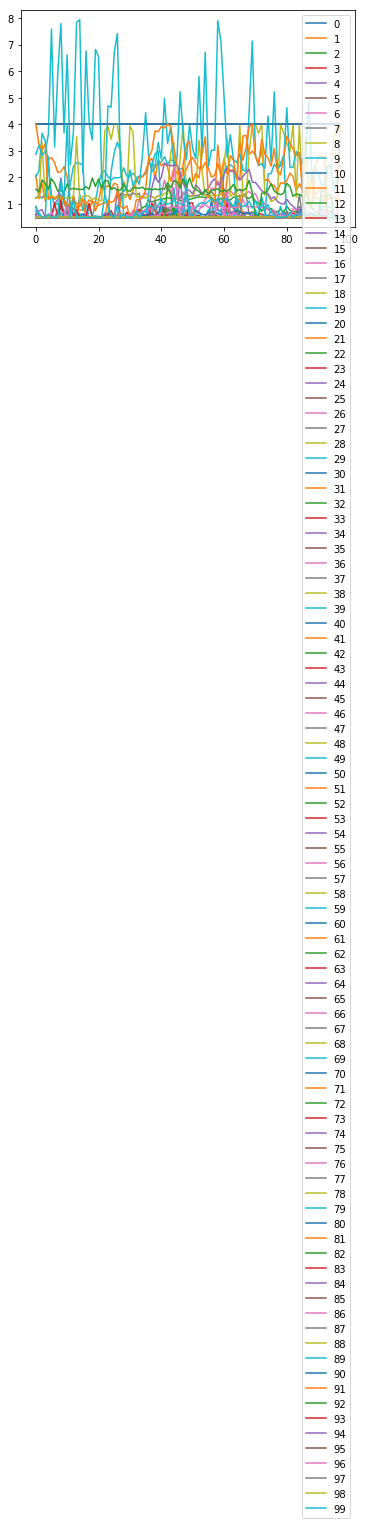

In [45]:
df_app_res_cpu=df_app_res['cpu'].str.split('|',expand=True)

df_app_res_cpu=df_app_res_cpu.astype('float')

df_app_res_cpu=df_app_res_cpu.T

df_app_res_cpu.shape

df_app_res_cpu.iloc[:,:100].plot()

#### res_cpu_sum

In [193]:
df_app_res_cpu.sum(axis=0).describe()

count    9338.000000
mean       99.175799
std       148.978678
min        49.000000
25%        49.000000
50%        49.039000
75%        64.487750
max      3136.000000
dtype: float64

In [192]:
df_app_res.shape

(9338, 203)

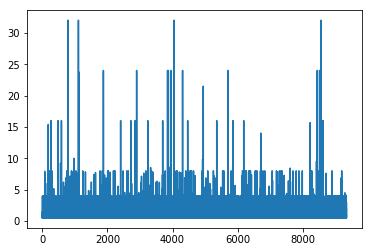

In [50]:
# df_app_res_cpu=df_app_res_cpu.T
df_app_res_cpu.shape
# df_app_res_cpu.describe()
df_app_res_cpu.max(axis=0).plot()

#### expand the cpu and mem

In [51]:
df_app_res_mem=df_app_res['mem'].str.split('|',expand=True)

df_app_res_mem=df_app_res_mem.astype('float')

df_app_res_mem=df_app_res_mem.T

df_app_res_mem.shape

# df_app_res_mem.iloc[:,:100].plot()

(98, 9338)

In [10]:
idx=2669
df_app_res.iloc[idx]

aid                                              app_2670
cpu     0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....
msem    1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1....
disk                                                   60
p                                                       0
m                                                       0
pm                                                      0
0                                                     0.5
1                                                     0.5
2                                                     0.5
3                                                     0.5
4                                                     0.5
5                                                     0.5
6                                                     0.5
7                                                     0.5
8                                                     0.5
9                                                     0.5
10            

In [5]:
for c in ['cpu','mem']:
    df_app_res=pd.concat( [df_app_res,df_app_res[c].str.split('|',expand=True)],axis=1)

In [7]:
df_app_res.iloc[1:100,1:98].cumsum(axis=0)

,cpu,mem,disk,p,m,pm,0,1,2,3,...,81,82,83,84,85,86,87,88,89,90
1,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,60,0,0,0,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,120,0,0,0,0.50.5,0.50.5,0.50.5,0.50.5,...,0.50.5,0.50.5,0.50.5,0.50.5,0.50.5,0.50.5,0.50.5,0.50.5,0.50.5,0.50.5
3,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,180,0,0,0,0.50.50.5,0.50.50.5,0.50.50.5,0.50.50.5,...,0.50.50.5,0.50.50.5,0.50.50.5,0.50.50.5,0.50.50.5,0.50.50.5,0.50.50.5,0.50.50.5,0.50.50.5,0.50.50.5
4,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,240,0,0,0,0.50.50.50.5,0.50.50.50.5,0.50.50.50.501,0.50.50.50.5,...,0.50.50.50.5,0.50.50.50.5,0.50.50.50.5,0.50.50.50.5,0.50.50.50.5,0.50.50.50.5,0.50.50.50.5,0.50.50.50.5,0.50.50.50.555,0.50.50.50.5
5,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,300,0,0,0,0.50.50.50.50.5,0.50.50.50.50.5,0.50.50.50.5010.5,0.50.50.50.50.5,...,0.50.50.50.50.5,0.50.50.50.50.5,0.50.50.50.50.5,0.50.50.50.50.5,0.50.50.50.50.5,0.50.50.50.50.5,0.50.50.50.50.5,0.50.50.50.50.5,0.50.50.50.5550.5,0.50.50.50.50.5
6,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,360,0,0,0,0.50.50.50.50.50.5,0.50.50.50.50.50.5,0.50.50.50.5010.50.5,0.50.50.50.50.50.5,...,0.50.50.50.50.50.5,0.50.50.50.50.50.5,0.50.50.50.50.50.5,0.50.50.50.50.50.5,0.50.50.50.50.50.5,0.50.50.50.50.50.5,0.50.50.50.50.50.5,0.50.50.50.50.50.5,0.50.50.50.5550.50.5,0.50.50.50.50.50.5
7,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,420,0,0,0,0.50.50.50.50.50.50.5,0.50.50.50.50.50.50.5,0.50.50.50.5010.50.50.5,0.50.50.50.50.50.50.5,...,0.50.50.50.50.50.50.5,0.50.50.50.50.50.50.5,0.50.50.50.50.50.50.5,0.50.50.50.50.50.50.5,0.50.50.50.50.50.50.5,0.50.50.50.50.50.50.5,0.50.50.50.50.50.50.5,0.50.50.50.50.50.50.5,0.50.50.50.5550.50.50.5,0.50.50.50.50.50.50.5
8,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,480,0,0,0,0.50.50.50.50.50.50.50.5,0.50.50.50.50.50.50.50.5,0.50.50.50.5010.50.50.50.5,0.50.50.50.50.50.50.50.5,...,0.50.50.50.50.50.50.50.5,0.50.50.50.50.50.50.50.5,0.50.50.50.50.50.50.50.5,0.50.50.50.50.50.50.50.5,0.50.50.50.50.50.50.50.5,0.50.50.50.50.50.50.50.5,0.50.50.50.50.50.50.50.5,0.50.50.50.50.50.50.50.5,0.50.50.50.5550.50.50.50.5,0.50.50.50.50.50.50.50.5
9,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,540,0,0,0,0.50.50.50.50.50.50.50.54,0.50.50.50.50.50.50.50.54,0.50.50.50.5010.50.50.50.54,0.50.50.50.50.50.50.50.54,...,0.50.50.50.50.50.50.50.54,0.50.50.50.50.50.50.50.54,0.50.50.50.50.50.50.50.54,0.50.50.50.50.50.50.50.54,0.50.50.50.50.50.50.50.54,0.50.50.50.50.50.50.50.54,0.50.50.50.50.50.50.50.54,0.50.50.50.50.50.50.50.54,0.50.50.50.5550.50.50.50.54,0.50.50.50.50.50.50.50.54
10,0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0.5|0....,4.39343643188|4.39361572266|4.41985321045|4.40...,600,0,0,0,0.50.50.50.50.50.50.50.540.5,0.50.50.50.50.50.50.50.540.5,0.50.50.50.5010.50.50.50.540.5,0.50.50.50.50.50.50.50.540.5,...,0.50.50.50.50.50.50.50.540.5,0.50.50.50.50.50.50.50.540.5,0.50.50.50.50.50.50.50.540.5,0.50.50.50.50.50.50.50.540.5,0.50.50.50.50.50.50.50.540.5,0.50.50.50.50.50.50.50.540.5,0.50.50.50.50.50.50.50.540.5,0.50.50.50.50.50.50.50.540.5,0.50.50.50.5550.50.50.50.540.5,0.50.50.50.50.50.50.50.540.5


In [10]:
df_app_res.shape

(9338, 203)

In [9]:
a=[1,2,3]
pd.Series(a).cumsum(axis=0)

0    1
1    3
2    6
dtype: int64

#### instance deploy , null find, and devide

In [38]:
a,b=df_ins.iid.str.split('_').str
# astype(int)

b=b.astype(int)

b.sort_values()

In [102]:
df=pd.DataFrame(b)

df['iid_copy']=b

df_ref=pd.DataFrame(np.arange(1,99999),columns=['iid'])

df_ref.shape

m=pd.merge(df,df_ref,on='iid',how='outer')

In [108]:
m.shape

m[m['iid_copy'].isnull()].shape[0]+df.shape[0]
# m[m['iid_copy'].isnull()].iid

(99998, 2)

In [46]:
b.describe()

count    68219.000000
mean     50024.417787
std      28859.401685
min          2.000000
25%      25017.500000
50%      50101.000000
75%      75023.500000
max      99998.000000
Name: iid, dtype: float64

In [55]:
x.shape

(68219,)

In [54]:
import random
idx=random.randint(1,10)
df_ins.iloc[idx]

iid    inst_93612
aid       app_618
mid           NaN
Name: 6, dtype: object

In [55]:
df_ins.describe()

,iid,aid,mid
count,68219,68219,29996
unique,68219,9338,2515
top,inst_91784,app_4825,machine_5924
freq,1,610,19


In [56]:
df_ins.isnull().sum()

iid        0
aid        0
mid    38223
dtype: int64

In [57]:
29996+38222,df_ins.shape

(68218, (68219, 3))

In [58]:
df_ins.notnull()
df_ins.isnull()

,iid,aid,mid
0,False,False,True
1,False,False,True
2,False,False,False
3,False,False,True
4,False,False,False
5,False,False,False
6,False,False,True
7,False,False,False
8,False,False,False
9,False,False,True


In [59]:
df_ins_undeploy=df_ins[df_ins['mid'].isnull()]

df_ins_deploy=df_ins[df_ins['mid'].notnull()]

df_ins_deploy.shape,df_ins_undeploy.shape

((29996, 3), (38223, 3))

In [60]:
group=df_ins_deploy.groupby(['aid'])

In [61]:
for group,name in enumerate(group):
    print(group)
    print(name)

0
('app_10',               iid     aid           mid
39992  inst_85725  app_10  machine_3022)
1
('app_100',               iid      aid           mid
22142  inst_91628  app_100  machine_2056
26598  inst_82426  app_100  machine_5123
48540  inst_20030  app_100   machine_254)
2
('app_1000',               iid       aid           mid
25048  inst_98477  app_1000  machine_2741)
3
('app_1001',               iid       aid           mid
13471  inst_52363  app_1001  machine_2521)
4
('app_1002',               iid       aid           mid
30299  inst_81071  app_1002  machine_5398
42444  inst_95837  app_1002  machine_5821
52048  inst_93536  app_1002  machine_3585
55563  inst_97528  app_1002   machine_728)
5
('app_1003',               iid       aid           mid
68111  inst_87377  app_1003  machine_3106)
6
('app_1004',               iid       aid           mid
14181  inst_53706  app_1004  machine_1424)
7
('app_1006',               iid       aid           mid
36572  inst_32279  app_1006  machine_5775)
8

('app_1086',               iid       aid           mid
39220  inst_83800  app_1086  machine_4437
58929  inst_51640  app_1086  machine_4962)
71
('app_1087',               iid       aid           mid
22396  inst_91809  app_1087  machine_3592)
72
('app_1090',               iid       aid           mid
1091    inst_1932  app_1090   machine_145
39280  inst_70021  app_1090  machine_5125)
73
('app_1091',               iid       aid           mid
18273  inst_38687  app_1091  machine_2769
49910  inst_18594  app_1091  machine_5546)
74
('app_1093',               iid       aid           mid
59286  inst_70702  app_1093  machine_3272)
75
('app_1095',               iid       aid           mid
21639  inst_78154  app_1095  machine_4935)
76
('app_1096',               iid       aid           mid
1135   inst_95412  app_1096   machine_564
10117   inst_8078  app_1096  machine_2256
18083  inst_51526  app_1096  machine_2997
37498  inst_74656  app_1096  machine_5763
39464  inst_33321  app_1096  machine_5541
555

('app_1170',               iid       aid          mid
45976  inst_65488  app_1170  machine_973)
140
('app_1171',               iid       aid           mid
30216  inst_16762  app_1171  machine_1772)
141
('app_1172',               iid       aid           mid
55134  inst_28450  app_1172  machine_1513
57472  inst_34060  app_1172  machine_1276)
142
('app_1173',               iid       aid           mid
4015   inst_52434  app_1173  machine_4398
4431   inst_36924  app_1173  machine_4670
5000   inst_55077  app_1173  machine_5915
8265   inst_60785  app_1173  machine_4169
10959  inst_31768  app_1173  machine_2723
15729  inst_25649  app_1173  machine_3438
16973  inst_61160  app_1173  machine_1273
18859  inst_66462  app_1173  machine_1508
19211  inst_12040  app_1173  machine_2498
20737  inst_52971  app_1173  machine_4787
24449  inst_45549  app_1173  machine_3518
24660  inst_72627  app_1173  machine_2915
25645  inst_80299  app_1173  machine_3342
30515  inst_66229  app_1173  machine_1537
31969  inst

('app_1261',               iid       aid           mid
40906  inst_81778  app_1261  machine_5955)
209
('app_1262',               iid       aid           mid
22512  inst_82357  app_1262  machine_4049
61669  inst_31344  app_1262  machine_1746)
210
('app_1263',               iid       aid           mid
16743  inst_86176  app_1263  machine_2923
25648  inst_32136  app_1263   machine_236
30025  inst_64550  app_1263  machine_4947
42573  inst_75545  app_1263  machine_3540)
211
('app_1264',              iid       aid           mid
6395  inst_82875  app_1264  machine_3797)
212
('app_1267',               iid       aid           mid
61812  inst_22684  app_1267  machine_4777)
213
('app_1268',               iid       aid           mid
21946  inst_81561  app_1268  machine_3886)
214
('app_1269',               iid       aid           mid
44654  inst_63680  app_1269  machine_3751)
215
('app_127',               iid      aid           mid
21193  inst_83067  app_127  machine_5973
24762  inst_66971  app_127

('app_1352',               iid       aid           mid
7114   inst_45206  app_1352  machine_1856
10907  inst_90402  app_1352  machine_1744)
280
('app_1353',               iid       aid           mid
26798  inst_83233  app_1353  machine_2562)
281
('app_1354',               iid       aid           mid
37686  inst_41820  app_1354  machine_3083
54685  inst_49517  app_1354   machine_669)
282
('app_1356',               iid       aid           mid
7394   inst_81218  app_1356  machine_4921
7843   inst_44722  app_1356  machine_3887
10034  inst_77754  app_1356  machine_4552
15211  inst_13556  app_1356  machine_4673
17678  inst_47283  app_1356  machine_3235
17925  inst_92770  app_1356  machine_4948
18678  inst_90848  app_1356  machine_5558
19355  inst_33068  app_1356  machine_3780
19912  inst_35195  app_1356  machine_3320
21865    inst_395  app_1356  machine_3462
25762  inst_45639  app_1356  machine_1659
28538   inst_4875  app_1356  machine_5442
31360  inst_53153  app_1356  machine_2015
33272  in

('app_1432',               iid       aid          mid
42624  inst_15803  app_1432  machine_642)
350
('app_1433',               iid       aid           mid
40177  inst_76640  app_1433  machine_1549)
351
('app_1434',               iid       aid           mid
16842  inst_82171  app_1434  machine_4412)
352
('app_1435',               iid       aid           mid
45794  inst_95050  app_1435  machine_1588)
353
('app_1436',               iid       aid           mid
29836  inst_62409  app_1436  machine_3605)
354
('app_1437',               iid       aid           mid
690     inst_2816  app_1437  machine_2985
1197   inst_86776  app_1437  machine_2096
6143   inst_52349  app_1437   machine_346
7144   inst_43271  app_1437  machine_5394
9024   inst_75149  app_1437  machine_3572
10499  inst_77188  app_1437  machine_3142
13455  inst_76924  app_1437  machine_5529
13591   inst_2947  app_1437  machine_4104
14603  inst_90395  app_1437  machine_5032
15336  inst_67161  app_1437  machine_4933
15730  inst_36996

('app_1527',               iid       aid           mid
51740  inst_80392  app_1527  machine_3191)
418
('app_153',              iid      aid          mid
59304  inst_4844  app_153  machine_596)
419
('app_1530',               iid       aid           mid
25291  inst_66257  app_1530  machine_5730
33502  inst_96562  app_1530  machine_4972
58329    inst_370  app_1530  machine_5118)
420
('app_1531',               iid       aid           mid
52500  inst_83810  app_1531  machine_4347)
421
('app_1533',               iid       aid           mid
5964   inst_42956  app_1533  machine_3567
16459  inst_10576  app_1533  machine_3530
53827  inst_72506  app_1533  machine_4678)
422
('app_1534',               iid       aid           mid
10408  inst_40239  app_1534  machine_1398
54176  inst_44089  app_1534  machine_2489)
423
('app_1536',               iid       aid           mid
12023  inst_90522  app_1536  machine_1730)
424
('app_1537',               iid       aid           mid
22290  inst_94890  app_1537 

('app_1629',               iid       aid           mid
21990  inst_44602  app_1629  machine_3029)
493
('app_163',               iid      aid           mid
32018  inst_13245  app_163  machine_5398)
494
('app_1630',              iid       aid           mid
7634  inst_72077  app_1630  machine_2673)
495
('app_1635',               iid       aid           mid
40     inst_80462  app_1635  machine_3825
1830   inst_63851  app_1635  machine_1346
5885   inst_95168  app_1635  machine_5141
6433   inst_93811  app_1635  machine_4252
8762   inst_39375  app_1635  machine_3286
14797  inst_56697  app_1635  machine_2881
16587  inst_11584  app_1635  machine_3525
22801  inst_95278  app_1635  machine_2640
25410  inst_74110  app_1635    machine_51
25956   inst_5099  app_1635  machine_4331
29400  inst_43139  app_1635  machine_5856
31066  inst_31213  app_1635  machine_4031
33851  inst_22034  app_1635  machine_1108
34411  inst_41831  app_1635  machine_4058
37110  inst_27289  app_1635  machine_2917
40688  inst_45

('app_172',               iid      aid          mid
59627  inst_11730  app_172  machine_506)
563
('app_1720',               iid       aid           mid
50076  inst_20765  app_1720  machine_3454)
564
('app_1721',               iid       aid           mid
14182  inst_54591  app_1721  machine_2486)
565
('app_1722',               iid       aid           mid
14217  inst_75868  app_1722  machine_5423
41264  inst_12135  app_1722  machine_5323
43369  inst_47305  app_1722  machine_5439)
566
('app_1723',               iid       aid           mid
766    inst_76300  app_1723  machine_3170
4389   inst_26109  app_1723  machine_2897
5693   inst_37162  app_1723  machine_1323
5985    inst_9383  app_1723  machine_5782
9478    inst_5514  app_1723  machine_1354
10325  inst_16851  app_1723  machine_3167
12917  inst_10456  app_1723  machine_3530
13191  inst_49479  app_1723  machine_4072
13621  inst_21330  app_1723  machine_4620
15340  inst_21940  app_1723  machine_1947
23097  inst_61658  app_1723  machine_1

('app_1802',              iid       aid           mid
4333  inst_12617  app_1802  machine_3123)
633
('app_1803',               iid       aid           mid
24177  inst_38291  app_1803  machine_3308)
634
('app_1804',               iid       aid           mid
32016  inst_24548  app_1804  machine_4864
32531  inst_97799  app_1804  machine_5448
38490  inst_65847  app_1804  machine_3543
38914  inst_18418  app_1804  machine_4802)
635
('app_1805',               iid       aid           mid
19178  inst_86363  app_1805   machine_334
41716  inst_59305  app_1805  machine_1966)
636
('app_181',               iid      aid          mid
36373  inst_77367  app_181  machine_657)
637
('app_1810',               iid       aid           mid
18745  inst_66988  app_1810  machine_1862
38409  inst_80113  app_1810  machine_4457
43587   inst_3794  app_1810  machine_4029
67566  inst_29168  app_1810   machine_299)
638
('app_1813',               iid       aid           mid
916    inst_68031  app_1813  machine_3257
2092

('app_1892',              iid       aid           mid
4304  inst_53804  app_1892  machine_5195)
708
('app_1893',               iid       aid           mid
17058  inst_84681  app_1893  machine_4475)
709
('app_1896',               iid       aid          mid
64722  inst_22417  app_1896  machine_722)
710
('app_1897',               iid       aid           mid
53999  inst_34259  app_1897  machine_2914)
711
('app_1898',              iid       aid           mid
25163  inst_2810  app_1898  machine_5482)
712
('app_1899',               iid       aid           mid
10083  inst_75601  app_1899  machine_3545
12581  inst_88400  app_1899  machine_4699
40136  inst_12263  app_1899  machine_5162)
713
('app_19',               iid     aid           mid
3226   inst_87958  app_19  machine_3132
27141  inst_39605  app_19  machine_3561
45207  inst_41638  app_19  machine_3542)
714
('app_190',               iid      aid           mid
17592  inst_10432  app_190  machine_5942
35044  inst_89449  app_190  machine_2937

('app_1973',               iid       aid           mid
2462   inst_52915  app_1973  machine_4868
4747   inst_33411  app_1973  machine_3529
5223   inst_38917  app_1973   machine_618
6151   inst_53218  app_1973  machine_2659
10615  inst_23720  app_1973   machine_457
16132  inst_89283  app_1973  machine_2102
17017  inst_53849  app_1973  machine_1411
30260    inst_259  app_1973  machine_2283
41873  inst_97322  app_1973  machine_2914
48069  inst_68012  app_1973  machine_4976
63302  inst_38035  app_1973  machine_4645
64270  inst_66904  app_1973   machine_900)
783
('app_1974',               iid       aid           mid
32451  inst_57310  app_1974  machine_2712)
784
('app_1975',               iid       aid           mid
34930  inst_76819  app_1975  machine_3332)
785
('app_1978',               iid       aid           mid
57326  inst_30056  app_1978  machine_4029)
786
('app_1979',               iid       aid           mid
28368  inst_37728  app_1979  machine_5460)
787
('app_198',               ii

KeyboardInterrupt: 

#### interference

In [62]:
df_app_inter.shape

(35242, 3)

In [63]:
df_app_inter.iloc[1]

aid    app_6585
bid    app_8959
v             0
Name: 1, dtype: object

In [64]:
for c in list('ab'):
    _,df_app_inter[c]=df_app_inter[c].str.split('_').str
    df_app_inter[c]=df_app_inter[c].astype('int')

KeyError: 'a'

In [65]:
df_app_inter

,aid,bid,v
0,app_8361,app_2163,0
1,app_6585,app_8959,0
2,app_5732,app_3361,2
3,app_5732,app_1919,2
4,app_5732,app_2749,2
5,app_5732,app_1148,2
6,app_5732,app_2482,2
7,app_5732,app_6234,2
8,app_5732,app_8017,1
9,app_5732,app_4193,2


In [66]:
idx=random.randint(1,df_app_inter.shape[0])
df_app_inter.iloc[idx]

aid     app_626
bid    app_2245
v             2
Name: 10372, dtype: object

In [67]:
df_app_inter['v'].dtype

dtype('int64')

In [68]:
df_app_inter[df_app_inter['a']==df_app_inter['b']].shape

KeyError: 'a'

In [69]:
df_app_inter[df_app_inter['a']==df_app_inter['b']]

KeyError: 'a'

#### machine resource

In [70]:
df_machine.iloc[0]

mid     machine_1
cpu            32
mem            64
disk          600
p               7
m               3
pm              7
Name: 0, dtype: object

In [71]:
df_machine.p.value_counts()

df_machine.m.value_counts()

df_machine.pm.value_counts()

7    3000
9    3000
Name: pm, dtype: int64

In [72]:
df_machine.mid.unique().shape,df_machine.shape

((6000,), (6000, 7))

In [73]:
cols=df_machine.columns
for c in df_machine.columns[1:]:
    print('{} has unique value {}'.format(c,len(df_machine[c].unique())))
    print('{} has unique value {}'.format(c,df_machine[c].unique()))
    print('{} has unique value {}'.format(c,df_machine[c].value_counts().values))
    


cpu has unique value 2
cpu has unique value [32 92]
cpu has unique value [3000 3000]
mem has unique value 2
mem has unique value [ 64 288]
mem has unique value [3000 3000]
disk has unique value 2
disk has unique value [ 600 1024]
disk has unique value [3000 3000]
p has unique value 1
p has unique value [7]
p has unique value [6000]
m has unique value 2
m has unique value [3 7]
m has unique value [3000 3000]
pm has unique value 2
pm has unique value [7 9]
pm has unique value [3000 3000]


In [74]:
df_su.iloc[1]

inst_101        inst_103
 machine_1     machine_3
Name: 1, dtype: object

In [6]:
cols=['cpu','mem','disk','p','m','pm']
cols_rn=[]
for c in cols:
    val_map={each:str(id) for id,each in enumerate(df_machine[c].unique())}
    c_rn='_'.join([c,'en'])
    cols_rn.append(c_rn)
    df_machine[c_rn]=df_machine[c].map(val_map)

In [76]:
df_machine.iloc[1]

mid        machine_2
cpu               32
mem               64
disk             600
p                  7
m                  3
pm                 7
cpu_en             0
mem_en             0
disk_en            0
p_en               0
m_en               0
pm_en              0
Name: 1, dtype: object

In [7]:
df_machine[cols_rn].sum(axis=1).value_counts()

111011.0    3000
0.0         3000
dtype: int64

In [8]:
df_machine['target']=df_machine[cols_rn].sum(axis=1)

In [9]:
df_machine['target']
val_map={each:id for id,each in enumerate(df_machine.target.unique())}
df_machine['target']=df_machine['target'].map(val_map)

In [10]:
df_machine.head()

,mid,cpu,mem,disk,p,m,pm,cpu_en,mem_en,disk_en,p_en,m_en,pm_en,target
0,machine_1,32,64,600,7,3,7,0,0,0,0,0,0,0
1,machine_2,32,64,600,7,3,7,0,0,0,0,0,0,0
2,machine_3,32,64,600,7,3,7,0,0,0,0,0,0,0
3,machine_4,32,64,600,7,3,7,0,0,0,0,0,0,0
4,machine_5,32,64,600,7,3,7,0,0,0,0,0,0,0


In [81]:
df_machine.target.value_counts()

1    3000
0    3000
Name: target, dtype: int64

In [82]:
df_app_inter.values.shape, df_app_res.values.shape, df_ins.values.shape, df_machine.shape

((35242, 3), (9338, 203), (68219, 3), (6000, 14))

In [12]:
df_app_inter_copy=df_app_inter.copy()

In [13]:
df_app_inter=df_app_inter_copy.copy()

In [14]:
values=np.vstack([df_app_inter.values,df_app_inter[['bid','aid','v']].values])

df_app_inter=pd.DataFrame(values,columns=['aid','bid','v'])

# df_exp=df_app_inter.groupby('aid')['bid'].apply(lambda x: x.duplicated().sum())

def make_vector(aids):
    vec=np.zeros(df_ins.aid.nunique())
#     adis.bid.value_counts().values[0]
    for id,values in zip(aids.bid,aids.v):
        index=int(id.split('_')[-1])-1
#         vec[int(id.split('_')[-1])-1]+=values
#         if id=='app_8129':
#             print(id,values)
#             print(vec.max())
        vec[index]+=values
    if len(np.argwhere(vec==7))>0:
#         print(aids.aid)
        print('----------')
        print(np.argwhere(vec==7))
        print(aids.aid.value_counts())
    vec=vec.astype(int)
#     return pd.Series([''.join(vec.astype(str)),vec.max()],index=['vec','vec_max'])
    return pd.Series([(vec==7)*vec.T,(vec==5)*vec.T,(vec==4)*vec.T,(vec==3)*vec.T,(vec==1)*vec.T],index=['vec7','vec5','vec4','vec3','vec1'])

### mark 0718

In [31]:
df=df_app_inter[df_app_inter['aid']=='app_275'][['bid','v']]
df[df.bid=='app_4242']

,bid,v
27357,app_4242,0
66802,app_4242,2


In [28]:
df_app_inter[df_app_inter.aid=='app_275'].bid.describe()

count           87
unique          84
top       app_4242
freq             2
Name: bid, dtype: object

In [16]:
aids.shape

(65, 3)

----------
[[ 275]
 [6489]
 [6692]
 [7442]
 [8965]]


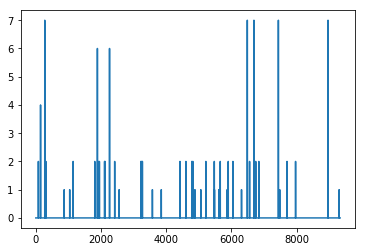

In [233]:
vec=np.zeros(df_ins.aid.nunique())
for id,values in zip(aids.bid,aids.v):
     index=int(id.split('_')[-1])-1
     if values==7:
        print(index)
        print(values)
     vec[index]+=values
if len(np.argwhere(vec==7))>0:
     print('----------')
     print(np.argwhere(vec==7))
plt.plot(vec)

In [177]:
df_ins.aid.nunique()

9338

#### here, i freeze the handler into a csv file

In [272]:
cols=['aid','bid','v']

# df_app_inter=df_app_inter.groupby('aid')[cols].apply(lambda x: ':'.join(x.v),axis=1).reset_index()
df_app_inter=df_app_inter.iloc[:].groupby('aid')[cols].apply(lambda x: make_vector(x)).reset_index()

df_app_inter['vec7']=df_app_inter.vec7.apply(lambda x:''.join(x.astype(str)))
df_app_inter['vec4']=df_app_inter.vec4.apply(lambda x:''.join(x.astype(str)))
df_app_inter['vec3']=df_app_inter.vec3.apply(lambda x:''.join(x.astype(str)))
df_app_inter['vec5']=df_app_inter.vec5.apply(lambda x:''.join(x.astype(str)))
df_app_inter['vec1']=df_app_inter.vec1.apply(lambda x:''.join(x.astype(str)))

----------
[[ 275]
 [6489]
 [6692]
 [7442]
 [8965]]
app_147    65
Name: aid, dtype: int64
----------
[[ 275]
 [6489]
 [6692]
 [7442]
 [8965]]
app_1891    18
Name: aid, dtype: int64
----------
[[ 275]
 [6489]
 [6692]
 [7442]
 [8965]]
app_2263    34
Name: aid, dtype: int64
----------
[[ 275]
 [6489]
 [6692]
 [7442]
 [8965]]
app_233    17
Name: aid, dtype: int64
----------
[[ 146]
 [ 232]
 [1890]
 [2262]
 [5878]]
app_276    12
Name: aid, dtype: int64


KeyboardInterrupt: 

In [ ]:
df_app_inter.head()

#### reading from the csv

In [282]:
df_app_inter=pd.read_csv('./data/diaodu/df_app_inter.csv')

In [ ]:
df_app_inter_copy=df_app_inter.copy()

In [ ]:
df_app_inter[df_app_inter.vec_max==5].vec.describe()

In [ ]:
gp=df_app_inter.iloc[:100].groupby('aid')
li=[]
for group,v in gp:
    vec=np.zeros(df_ins.aid.nunique())
    print('____')
    for id, values in zip(v.bid,v.v):
        index=int(id.split('_')[-1])-1
#         print(id,values)
        vec[index]+=values
    li.append(vec)
gp['vec']=pd.Series(li)
#     df[group]=vec
# pd.DataFrame_fr

In [ ]:
# np.argmax(df_app_inter.iloc[1][0][-1])
# df_app_inter.iloc[1][0][-1].
df_app_inter[0].apply(lambda x: x[-1].max()).value_counts()

In [ ]:
gp=df_app_inter.iloc[:100].groupby('aid')

# for id,each in enumerate(gp):
for group,values in gp:
    print(values.v)
#     df_app_inter_vec

In [ ]:
df_check=df_app_inter.groupby('aid')['bid'].apply(lambda x: x.duplicated().sum())
df_check.sum()==0

In [ ]:
a={'a':[1,2,4],'b':[2,2,4],'c':[1,1,1]}
c=pd.DataFrame.from_dict(a)

c.groupby('c').apply(lambda x: x.b.duplicated())

In [15]:
df_app_inter.shape

(1876, 7)

In [16]:
df_app_inter.head()

,Unnamed: 0,aid,vec7,vec5,vec4,vec3,vec1
0,0,app_100,0000000000000000000000000000000000000000000000...,[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0]
1,1,app_1001,0000000000000000000000000000000000000000000000...,[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0]
2,2,app_1002,0000000000000000000000000000000000000000000000...,[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0]
3,3,app_1004,0000000000000000000000000000000000000000000000...,[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0]
4,4,app_1008,0000000000000000000000000000000000000000000000...,[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0],[0 0 0 ... 0 0 0]


In [ ]:
df_app_inter.describe()

In [ ]:
_,df_app_inter['id']=df_app_inter['aid'].str.split('_').str
df_app_inter['id']=df_app_inter['id'].astype(int)

In [ ]:
df_app_inter.sort_values(by='id')

In [ ]:
df_ins.mid.nunique(),df_ins.aid.nunique(),df_ins.iid.nunique()

#### do I need to create such long vector

In [ ]:
vec=np.zeros(df_ins.aid.nunique())

In [ ]:
vec.shape

In [ ]:
def make_vector(aids):
    vec=np.zeros(df_ins.aid.nunique())
    for id in aids.split(':'):
        vec[int(id.split('_')[-1])-1]+=1
    return vec

In [ ]:
df_app_inter['vec']=df_app_inter['bid'].apply(lambda x:make_vector(x))

In [ ]:
df_app_inter.iloc[:10]['vec']=df_app_inter[['bid','v']].apply(lambda x: x.bid,axis=0)

In [ ]:
df_app_inter.head()

In [ ]:
df_app_inter.shape

### merge

In [ ]:
# df_sum=pd.merge(df_machine,df_ins_deploy,on='mid',how='outer')

In [17]:
df_sum=pd.merge(df_machine,df_ins,on='mid',how='outer')

after the merge of machine info into the sum, the deployed iid, and plus the undeployed iid, {{df_sum.iid.nunique()+df_sum.iid.isnull().sum()}}

In [145]:
df_sum.iid.describe()

count          68219
unique         68219
top       inst_51845
freq               1
Name: iid, dtype: object

In [128]:
df_sum.iid.isnull().sum()

3485

In [129]:
df_sum.shape

(71704, 16)

In [ ]:
df_sum[df_sum['iid']=='inst_94270']

In [18]:
# del df_machine,df_ins
# gc.collect()

df_sum=pd.merge(df_sum,df_app_res,on='aid',how='outer')
# del df_app_res
# gc.collect()

In [19]:
df_sum.iid.nunique(), df_sum.shape

(68219, (71704, 218))

In [20]:
df_sum['disk']=df_sum['disk'+'_y']/df_sum['disk'+'_x']

In [138]:
df_sum_dp['disk'].value_counts()

0.058594    14700
0.100000     8823
0.039062     1437
0.097656     1370
0.066667      903
0.166667      796
0.078125      679
0.133333      374
0.195312      302
0.333333      203
0.146484       95
0.292969       69
0.250000       52
0.500000       46
0.117188       42
0.163086       20
0.833333       14
0.488281       11
0.200000       11
0.585938       10
0.244141        9
0.278333        9
1.000000        7
0.175781        6
0.416667        3
0.634766        2
0.300000        2
0.976562        1
Name: disk, dtype: int64

In [21]:
df_sum['deploy']=df_sum['mid'].notnull()&df_sum['iid'].notnull()
# df_sum['deploy']=df_sum['mid'].notnull()

In [22]:
df_sum=pd.merge(df_sum,df_app_inter,on='aid',how='outer')

del df_app_inter
gc.collect()

73

In [23]:
df_sum_dp=df_sum[df_sum['deploy']==True]
del df_sum
gc.collect()

7

In [24]:
col_in=[]
# col_in=['iid','aid','mid','cpu_y','mem_y','disk_y']
# col_in=['cpu_y','mem_y']
# col_in=[each for each in range(98)]
# col_in=col_in+'p_y:m_y:pm_y'.split(':')
# col_in+=['target']
# col_in+=['disk_x']
# col_in+=['disk_y']
# col_in+=['deploy']

# col_in+='p_m_pm'.split('_')
col_in+=['disk']
# col_in+=['bid']
# col_in+=['v']

#### ignore some fe

In [60]:
col_in+=['vec7']
col_in+=['vec5']
col_in+=['vec4']
col_in+=['vec3']
col_in+=['vec1']
# df_sum_dp[col_in]

In [25]:
col_in_en=[]
col_in_en+=['vec7']
col_in_en+=['vec5']
col_in_en+=['vec4']
col_in_en+=['vec3']
col_in_en+=['vec1']
# df_sum_dp[col_in]

In [26]:
df_sum_dp[['iid','aid','mid']+col_in].head()

,iid,aid,mid,disk
3485,inst_66529,app_393,machine_3,0.100000
3486,inst_75447,app_393,machine_2058,0.100000
3487,inst_47092,app_393,machine_3130,0.058594
3488,inst_49577,app_393,machine_4998,0.058594
3490,inst_99328,app_8767,machine_3,0.100000


In [27]:
vec7_id={vec:id for id,vec in enumerate(df_sum_dp.vec7.unique())}
vec5_id={vec:id for id,vec in enumerate(df_sum_dp.vec5.unique())}
vec4_id={vec:id for id,vec in enumerate(df_sum_dp.vec4.unique())}
vec3_id={vec:id for id,vec in enumerate(df_sum_dp.vec3.unique())}
vec1_id={vec:id for id,vec in enumerate(df_sum_dp.vec1.unique())}

df_sum_dp['vec7']=df_sum_dp.vec7.apply(lambda x:vec7_id[x])
df_sum_dp['vec5']=df_sum_dp.vec5.apply(lambda x:vec5_id[x])
df_sum_dp['vec4']=df_sum_dp.vec4.apply(lambda x:vec4_id[x])
df_sum_dp['vec3']=df_sum_dp.vec3.apply(lambda x:vec3_id[x])
df_sum_dp['vec1']=df_sum_dp.vec1.apply(lambda x:vec1_id[x])

In [84]:
df_sum_dp.isnull().sum()

mid               0
cpu_x             0
mem_x             0
disk_x            0
p_x               0
m_x               0
pm_x              0
cpu_en            0
mem_en            0
disk_en           0
p_en              0
m_en              0
pm_en             0
target            0
iid               0
aid               0
cpu_y             0
mem_y             0
disk_y            0
p_y               0
m_y               0
pm_y              0
0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
              ...  
76                0
77                0
78                0
79                0
80                0
81                0
82                0
83                0
84                0
85                0
86                0
87                0
88                0
89                0
90                0
91                0
92                0
93                0
94                0


In [28]:
# col_in_en=col_in[1:]

fe=encode_page_features(df_sum_dp[col_in_en])

In [121]:
fe.keys()

dict_keys(['vec3', 'vec7', 'vec4', 'vec1', 'vec5'])

In [139]:
# pd.concat([df_sum_dp,

# df_sum_dp.append
pd.concat([df_sum_dp,pd.DataFrame.from_records(fe['vec1'])])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

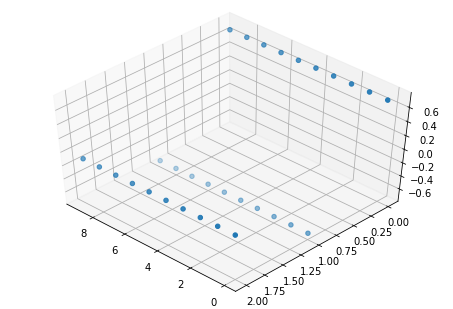

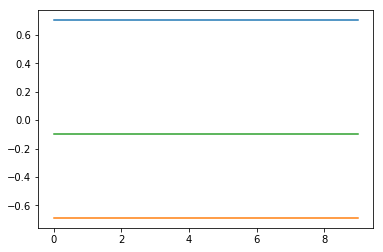

In [276]:
threed_view(fe['vec7'].values,end=10)

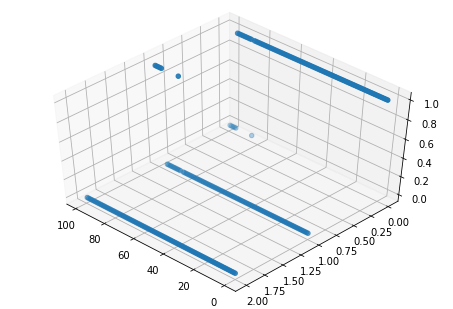

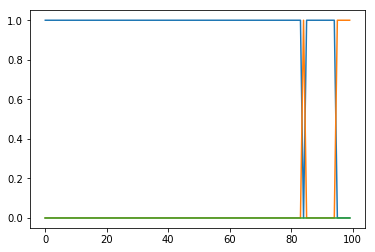

In [106]:
threed_view(fe['vec7'].values,end=100)

In [94]:
fe['vec7'].values[1]

array([ 0.70409155, -0.68931046, -0.09706812])

In [88]:
df_sum_dp['vec4'].value_counts()

0    20054
1     9942
Name: vec4, dtype: int64

In [95]:
fe['vec4']

,0,1
3485,0.704092,-0.704092
3486,0.704092,-0.704092
3487,0.704092,-0.704092
3488,0.704092,-0.704092
3490,0.704092,-0.704092
3491,0.704092,-0.704092
3492,0.704092,-0.704092
3493,0.704092,-0.704092
3494,0.704092,-0.704092
3495,0.704092,-0.704092


In [ ]:
df_sum_dp.bid.describe()

In [183]:
df_sum_dp[['iid','aid','mid','bid','v']].isnull().sum()

KeyError: "['bid' 'v'] not in index"

In [ ]:
df_sum_dp.iid.describe()

In [ ]:
df_sum_dp.target.value_counts()

In [ ]:
df_sum.target.value_counts()

In [ ]:
df_sum_dp[col_in].iid.describe()
df_sum_dp[col_in].mid.describe()

In [ ]:
plt.plot(df_sum_dp.target.values[:100],'ro')

In [ ]:
for c in 'p_m_pm'.split('_'):
    df_sum_dp[c]=df_sum[c+'_y']/df_sum_dp[c+'_x']
#     print(df_sum_dp[c+'_y'],df_sum_dp[c+'_x'])

#### p_m_pm

In [ ]:
df_sum_dp.p.value_counts()

In [ ]:
df_sum_dp.m.value_counts()

In [ ]:
df_sum_dp.pm.value_counts()

In [ ]:
df_sum_dp.disk.value_counts()

In [ ]:
for c in ['cpu_y','mem_y']:
    df_sum_dp=pd.concat( [df_sum_dp,df_sum_dp[c].str.split('|',expand=True)],axis=1)

In [ ]:
flags=0
for c in ['cpu_y','mem_y']:
    new=df_sum_dp[c].str.split('|',expand=True)
    if flags==1:
        df_sum_dp_fe=pd.concat([df_sum_dp_fe,new],axis=1)
    if flags==0:
        df_sum_dp_fe=new.copy()
        flags=1

#### TODO here is the problem because i ignore some data, i need to changes it here too

In [29]:
s=[]
for i in range(98):
    add=np.hstack([df_sum_dp[[i]+col_in].values.astype(float),fe['vec7'].values.astype(float)])
    add=np.hstack([add,fe['vec5'].values.astype(float)])
    add=np.hstack([add,fe['vec4'].values.astype(float)])
    add=np.hstack([add,fe['vec3'].values.astype(float)])
#     add=np.hstack([df_sum_dp[[i]+col_in].values.astype(float),fe['vec7'].values.astype(float)])
    s.append(add)
#     s.append(df_sum_dp[['disk','vec7','vec5','vec4','vec3','vec1',i]].values.astype(float))
#     s.append(fe['vec7'].values)
#     s.append(fe['vec4'].values)
#     s.append(df_sum_dp[col_in+[i]].values.astype(float))
#     s.append(fe['vec7'].values)
    
s=np.array(s)
s=s.transpose(1,0,2)

s.shape

(29996, 98, 12)

#### check_point

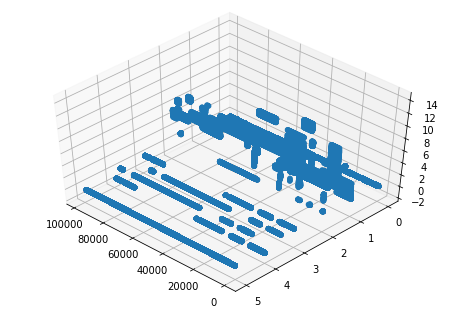

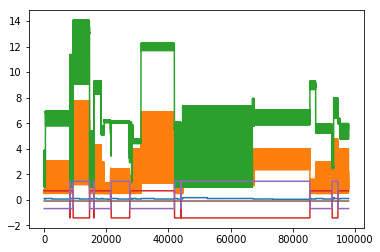

In [30]:
# fig=threed_view(pf_agent=ss.data.numpy()[0,:,:],end=100)
threed_view(pf_agent=s.reshape(-1,s.shape[-1])[:1000*98,:],end=1000*98)

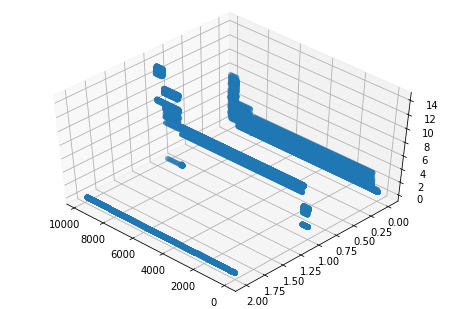

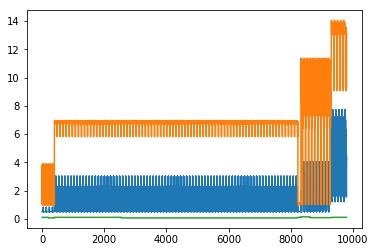

In [30]:
# fig=threed_view(pf_agent=ss.data.numpy()[0,:,:],end=100)
threed_view(pf_agent=s.reshape(-1,s.shape[-1])[:100*98,:3],end=100*98)

In [31]:
i=0

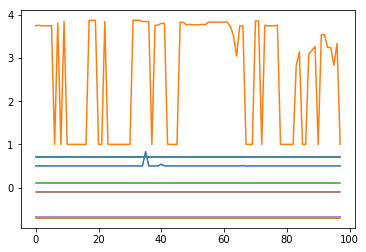

In [32]:
# m(s[1,:,:])
m=nn.BatchNorm1d(98)
s_check=torch.tensor(s,dtype=torch.float)
# tmp=s_check.data.numpy()[i,:,-2]
# plt.plot(s.data.numpy()[i,:,-1])
# plt.plot(tmp)
# plt.plot((tmp-tmp.mean())/tmp.std())
plt.plot(s_check.data.numpy()[i,:,:])
# plt.plot(rnn.bn(s).data.numpy()[i,:,:])
i=i+100

#### check later

/data/dotfiles_xy/nvim/plugged/tutorials/beginner_source/nlp/sequence_models_tutorial.py

- a gradien explode
- /data/dotfiles_xy/nvim/plugged/examples/word_language_model/main.py

In [ ]:
dst=(np.zeros(100,5),np.ones(100))

dsta=list(zip(*np.arange(30).reshape(3,10)))

dstb=list(zip(*np.arange(10).reshape(1,10)))

dst=list(zip(dsta,dstb))

In [50]:
%%file ./diaodu/dst.py

from torch.utils import data

class Dst(data.Dataset):
    def __init__(self,s,label):
        self.s=s
        self.label=label
    def __getitem__(self,index):
        import torch
        tmp=self.s[index][:,-1]
        tmp=(tmp-tmp.mean())/tmp.std()
        s_norm=np.hstack([self.s[index][:,:-1],tmp.reshape(-1,1)])
#         return self.s[index],self.label[index]
#         return tmp.reshape(-1,1),self.label[index]
        return s_norm,self.label[index]

    def __len__(self):
        return len(self.label)


Writing ./diaodu/dst.py


In [33]:
dst=Dst(s,df_sum_dp['target'].values)

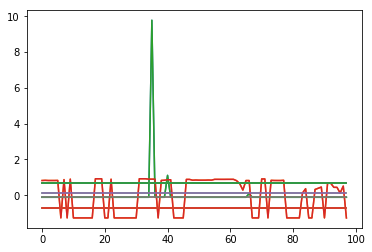

In [49]:
v_,l_=dst[1]

plt.plot(v_)

plt.plot(s[1])

In [130]:
i=0

In [132]:
# i=np.random.randint(29936)
i=i+80
v_,l_=dst[i]

v_.shape

t=v_[:,0:2]
# t=t.cumsum(axis=0)
print(t.std(0).sum())
if t.std(0).sum()==0:
#     print('f')
    t.fill(0)
else:
    t=(t-t.mean(0))/t.std(0)
# if t.std(axis=0):t.fill(0)
t=t.cumsum(0)
t=(t-t.mean(0))/t.std(0)
v_.std(0).shape
v_.std(0)

# v=np.hstack([t,v[:,2:]])

# threed_view(v_[:,:],end=100)

2.0000000105814566


array([1.00000001, 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [34]:
dst=Dst(s,df_sum_dp['target'].values)

dataloader=torch.utils.data.DataLoader(dataset=dst,batch_size=20,shuffle=False)
# dataloader=torch.utils.data.DataLoader()

In [56]:
nt=Nt(dataloader)

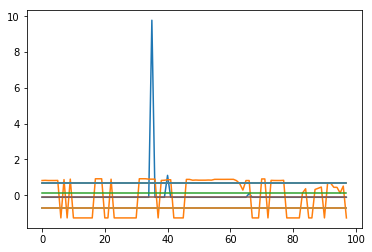

In [57]:
nt.it_()

In [61]:
%%file ./diaodu/util/gen_expand.py
def gen_expand(gen):
    for i,(x,y) in enumerate(gen):
    #     print(i)
    #     print(x.shape,y.shape)
        if i>100:
            break
    #     print(torch.tensor(x))
    #     print(torch.tensor(y))

Writing ./diaodu/util/gen_expand.py


In [35]:
it=iter(dataloader)

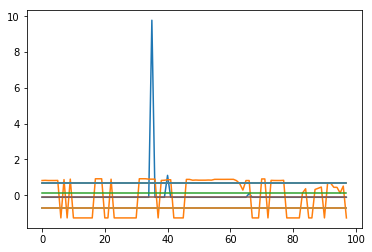

In [36]:
ss,label=next(it)

ss=torch.tensor(ss,dtype=torch.float)
label=torch.tensor(label,dtype=torch.long)

# plt.plot(ss.data.numpy()[1][:,-1])
# dt=ss.data.numpy().sum((2,1))
# dt=(dt-dt.mean())/dt.std()
plt.plot(ss.data.numpy()[1])
# plt.plot(label.data.numpy())

In [103]:
a=np.array([0.0,1])
if np.any(a==0)==True:
    print('y')

y


In [100]:
is 0 in a:
    print('y')

SyntaxError: invalid syntax (<ipython-input-100-2bf44eff8721>, line 1)

In [50]:
%%file diaodu/dst_supplement.py
it=iter(dataloader)
ss,label=next(it)
ss=torch.tensor(ss,dtype=torch.float)
label=torch.tensor(label,dtype=torch.long)

# plt.plot(ss.data.numpy()[1][:,-1])
plt.plot(ss.data.numpy()[0])

Writing diaodu/dst_supplement.py


In [123]:
%%file threed_view.py
# %load -n get_index
import numpy as np
def get_index(inp):
    a=np.zeros_like(inp)
    d1=np.where(a>-1)[0]
    d2=np.where(a>-1)[1]
    return d1,d2

# %load -n threed_view
# import numpy as np
def threed_view(pf_agent,end,start=0,ax=None):
    pf_agent=pf_agent[start:end,:]
    d1,d2=get_index(pf_agent)

    if ax==None:
        fig=plt.figure()
        ax = Axes3D(fig,
    #         rect=[0, 0, .95, 1], elev=0, azim=0)
    #         rect=[0, 0, 1, 1], elev=48, azim=134)
            rect=[0, 0, 1, 1], elev=48, azim=234)

    # ax.scatter(time_x[:,:,0] ,time_x[:,:,1] )
#     print(d1,d2)
    ax.scatter(d1,d2,pf_agent.reshape(1,-1))
    fig=plt.figure()
    plt.plot(pf_agent)
    return ax
#     ax.plot(d1,d2,pf_agent[:,start:end].reshape(1,-1))
#     d1,d2=get_index(pf_agent[start:end,:])
#     ax.scatter(d1,d2,pf_agent[start:end,:].reshape(1,-1))
#     ax.plot(d1,d2,'xy')

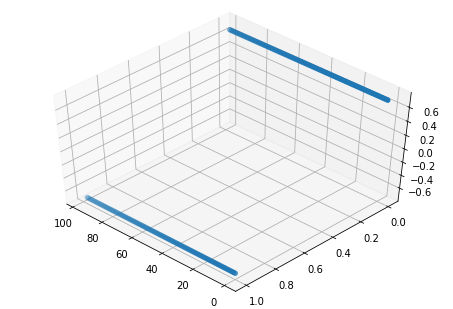

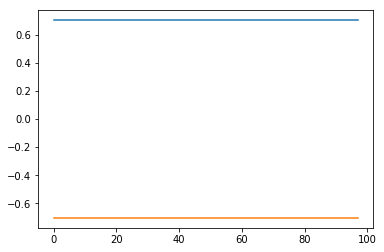

In [37]:
fig=threed_view(pf_agent=ss.data.numpy()[0,:,-2:],end=100)
# threed_view(pf_agent=s.reshape(-1,7)[:10*98,-3:-1],end=10*98)

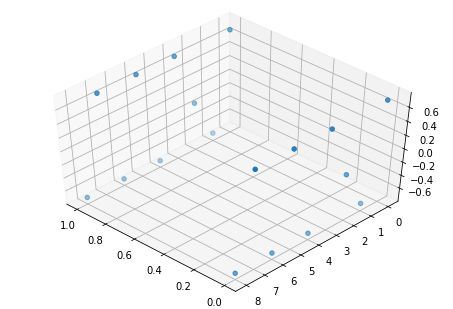

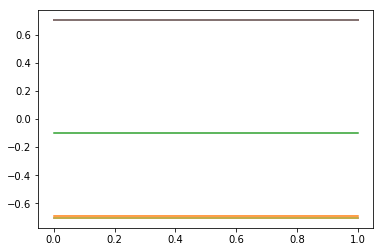

In [38]:
fig=threed_view(pf_agent=ss.data.numpy()[0,:,3:],end=2)
# threed_view(pf_agent=s.reshape(-1,7)[:10*98,-3:-1],end=10*98)

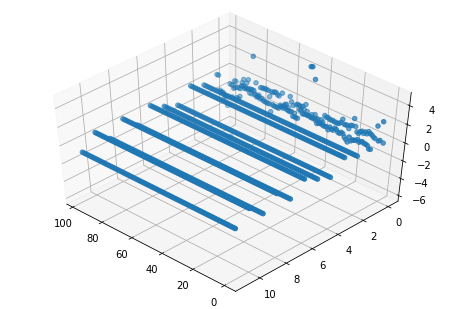

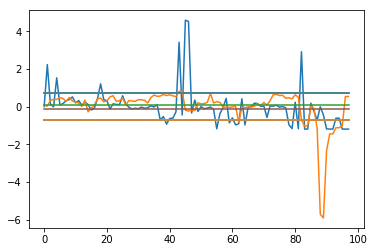

In [47]:
fig=threed_view(pf_agent=ss.data.numpy()[0,:,:],end=100)

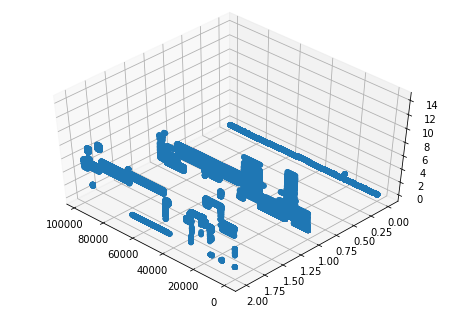

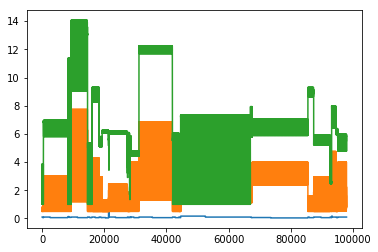

In [140]:
threed_view(pf_agent=ss.data.numpy().reshape(-1,ss.shape[-1])[:,:],end=1000*98)

#### %load -r 37-57 /data/dotfiles_xy/nvim/plugged/pytorch-tutorial/tutorials/02-intermediate/recurrent_neural_network/main.py

In [48]:
%%file diaodu/util/threed_view.py
# %load web_traffic/threed_view.py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def get_index(inp):
    a=np.zeros_like(inp)
    d1=np.where(a>-1)[0]
    d2=np.where(a>-1)[1]
    return d1,d2


def threed_view(pf_agent,end,start=0):
    d1,d2=get_index(pf_agent[start:end,:])

    fig=plt.figure()
    ax = Axes3D(fig,
#         rect=[0, 0, .95, 1], elev=0, azim=0)
        rect=[0, 0, 1, 1], elev=48, azim=134)

    # ax.scatter(time_x[:,:,0] ,time_x[:,:,1] )
    ax.scatter(d1,d2,pf_agent[start:end,:].reshape(1,-1))
#     d1,d2=get_index(pf_agent[start:end,:])
#     ax.scatter(d1,d2,pf_agent[start:end,:].reshape(1,-1))
    ax.plot(d1,d2,'-y')


Writing diaodu/util/threed_view.py


this recurrent network is to object detection the mnist dataset

In [48]:
%%file diaodu/model.py
# %load -r 37-57 /data/dotfiles_xy/nvim/plugged/pytorch-tutorial/tutorials/02-intermediate/recurrent_neural_network/main.py
# RNN Model (Many-to-One)
class RNN(nn.Module):
    def __init__(self,seq_len, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
#         self.bn=nn.BatchNorm1d(seq_len)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        # Forward propagate RNN
#         x = self.bn(x)
        out, _ = self.lstm(x, (h0, c0))

        # Decode hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out


Writing diaodu/model.py


### hypterparameters

In [37]:
rnn=RNN(98,12,128,2,2)
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(rnn.parameters(),lr=0.01)
# optimizer=optim.SGD(rnn.parameters(),lr=0.1)

In [68]:
rnn(ss).shape,label.shape

(torch.Size([20, 2]), torch.Size([20]))

#### loss before

In [38]:
def closure():
    optimizer.zero_grad()
    o=rnn(ss)
    loss=loss_fn(o,label)
    loss.backward()

In [64]:
optimizer.step(closure=closure)
loss_fn(rnn(ss),label)

tensor(0.6510)

In [73]:
m=nn.BatchNorm1d(98)
s_norm=m(s)

In [157]:
# %load -n threed_view
def threed_view(pf_agent,end,start=0,ax=None):
    pf_agent=pf_agent[start:end,:]
    d1,d2=get_index(pf_agent)

    if ax==None:
        fig=plt.figure()
        ax = Axes3D(fig,
    #         rect=[0, 0, .95, 1], elev=0, azim=0)
    #         rect=[0, 0, 1, 1], elev=48, azim=134)
            rect=[0, 0, 1, 1], elev=48, azim=234)

    # ax.scatter(time_x[:,:,0] ,time_x[:,:,1] )
#     print(d1,d2)
    ax.scatter(d1,d2,pf_agent.reshape(1,-1))
    fig=plt.figure()
    plt.plot(pf_agent)
    return ax
#     ax.plot(d1,d2,pf_agent[:,start:end].reshape(1,-1))
#     d1,d2=get_index(pf_agent[start:end,:])
#     ax.scatter(d1,d2,pf_agent[start:end,:].reshape(1,-1))
#     ax.plot(d1,d2,'xy')

# %load -n get_index
import numpy as np
def get_index(inp):
    a=np.zeros_like(inp)
    d1=np.where(a>-1)[0]
    d2=np.where(a>-1)[1]
    return d1,d2

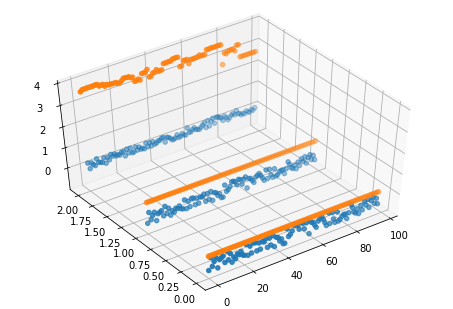

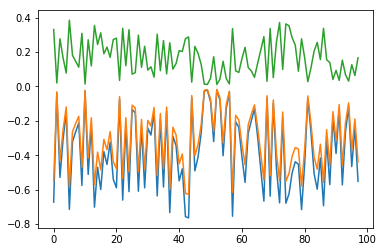

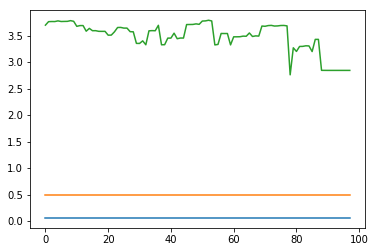

In [159]:
fig=threed_view(pf_agent=s_norm.data.numpy()[0,:,:],end=100)
threed_view(pf_agent=s.data.numpy()[0,:,:],end=100,ax=fig)

[0 0 0 0 0 1 1 1 1 1] [0 1 2 3 4 0 1 2 3 4]


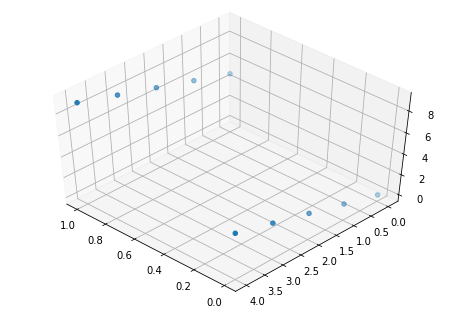

In [96]:
threed_view(pf_agent=np.arange(10).reshape(2,5),end=2)

In [86]:
s[1,:,0]

tensor(1.00000e-02 *
       [ 9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.7656,
         9.7656,  9.7656,  9.7656,  9.7656,  9.7656,  9.

#### training

In [65]:
%%timeit -n 90
optimizer.step(closure)

78 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 90 loops each)


In [39]:
from keras.utils.generic_utils import Progbar
EPOCH=100
batch_size=80
batch_round=int(dataloader.dataset.label.shape[0]/batch_size)

/home/.tbxy09/anaconda/envs/patent-landscape/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [45]:
batch_round

299

In [40]:
def save_checkpoint(state_dict,is_best,fn):
    torch.save(state_dict,fn)
    if is_best:
        shutil.copyfile(fn,'./model/diao_du/model_best.pth.tar')

In [ ]:
# dct={'key':'a','values':torch.randn(100,5)}
from sys import getsizeof
# getsizeof(dct)
# getsizeof(rnn.state_dict())
# getsizeof(rnn.parameters())

#### [init_weight.ipynb](init_weight.ipynb)

#### why not working the ,rnn models

1. if it is fit the models, the problem
2. how combine the non-sequence feature into the model
3. if the sequece appear to be time-correlation, if not , so rnn not fit, how much corrlation

https://github.com/Arturus/kaggle-web-traffic/blob/master/how_it_works.md

In [41]:
# %load -r 272-289 /data/dotfiles_xy/nvim/plugged/examples/imagenet/main.py

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


In [42]:
# EPOCH=1000
dataloader=torch.utils.data.DataLoader(dst,batch_size=batch_size,shuffle=True)

In [112]:
# dataloader training
import time
bar=Progbar(target=batch_round,width=30,interval=0.05)
batch_time=AverageMeter()
load_time=AverageMeter()
# checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.4954139292240143.pth.tar')
# rnn.load_state_dict(checkpoint['state_dict'])
for epoch in range(EPOCH):
    end=time.time()
    for id_,(s,label) in enumerate(dataloader):
        load_time.update(time.time()-end)
#         checkpoint=torch.load('./models/diaodu/rnn_with_inter_data.pth.tar')
#         rnn.load_state_dict(checkpoint['state_dict'])
#         s=torch.tensor(s,dtype=torch.float)
#         label=torch.tensor(label,dtype=torch.long)
        s=s.to(torch.float)
        label=label.to(torch.long)

        optimizer.zero_grad()
        o=rnn(s)

        loss=loss_fn(o,label)
        loss.backward()
        show_loss=[['loss',loss.data.numpy()]]
#         show_loss+=[['sizeof rnn',getsizeof(rnn.state_dict())]]
#         show_loss+=[['sizeof rnn para',getsizeof(rnn.parameters())]]
        optimizer.step()
    
        batch_time.update(time.time()-end)
        end=time.time()
        show_loss+=[['batch_time',batch_time.avg]]
        show_loss+=[['load_time',load_time.avg]]
        bar.update(id_,show_loss)
    save_checkpoint({'state_dict':rnn.state_dict()},is_best=False,
                    fn='./models/diaodu/rnn_with_inter_data_{}.pth.tar'.format(loss.data.numpy()))
#     rnn.parameters()[1]
#     print(epoch)

  2/374 [..............................] - ETA: 1119:31:57 - loss: 34.4538 - batch_time: -18.0520 - load_time: 0.0118

KeyboardInterrupt: 

In [43]:
###single batch training
ss,label=next(iter(dataloader))

import time
bar=Progbar(target=EPOCH,width=30,interval=0.05)
batch_time=AverageMeter()
load_time=AverageMeter()
checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.020386777818202972.pth.tar')
rnn.load_state_dict(checkpoint['state_dict'])
for epoch in range(EPOCH):
    end=time.time()
    load_time.update(time.time()-end)
#     checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.0009381065028719604.pth.tar')
#     rnn.load_state_dict(checkpoint['state_dict'])
    ss=torch.tensor(ss,dtype=torch.float)
    label=torch.tensor(label,dtype=torch.long)
    ss=ss.to(torch.float)
    label=label.to(torch.long)

    optimizer.zero_grad()
    o=rnn(ss)

    loss=loss_fn(o,label)
    loss.backward()
    show_loss=[['loss',loss.data.numpy()]]
#         show_loss+=[['sizeof rnn',getsizeof(rnn.state_dict())]]
#         show_loss+=[['sizeof rnn para',getsizeof(rnn.parameters())]]
    optimizer.step()

    batch_time.update(time.time()-end)
    end=time.time()
#     show_loss+=[['batch_time',batch_time.avg]]
#     show_loss+=[['load_time',load_time.avg]]
    bar.update(epoch,show_loss)
save_checkpoint({'state_dict':rnn.state_dict()},is_best=False,
                    fn='./models/diaodu/rnn_with_inter_data_{}.pth.tar'.format(loss.data.numpy()))
#     rnn.parameters()[1]
#     print(epoch)

  1/100 [..............................] - ETA: 2:25 - loss: 1.5997  

KeyboardInterrupt: 

In [111]:
import torch
checkpoint=torch.load('./models/diaodu/best/rnn_with_inter_data_0.020386777818202972.pth.tar')
rnn.load_state_dict(checkpoint['state_dict'])

In [44]:
save_checkpoint({'state_dict':rnn.state_dict()},is_best=False,
                fn='./models/diaodu/rnn_with_inter_data_{}.pth.tar'.format(loss.data.numpy()))

In [62]:
rnn.expand()

id:lstm.weight_ih_l0,torch.Size([512, 12])
id:lstm.weight_hh_l0,torch.Size([512, 128])
id:lstm.bias_ih_l0,torch.Size([512])
id:lstm.bias_hh_l0,torch.Size([512])
id:lstm.weight_ih_l1,torch.Size([512, 128])
id:lstm.weight_hh_l1,torch.Size([512, 128])
id:lstm.bias_ih_l1,torch.Size([512])
id:lstm.bias_hh_l1,torch.Size([512])
id:fc.weight,torch.Size([2, 128])
id:fc.bias,torch.Size([2])


In [63]:
rnn.next()

Parameter containing:
tensor([[-1.7558e+00, -2.5911e-02, -2.3921e+00,  ..., -2.3274e-01,
          1.3803e-01, -9.7709e-02],
        [ 1.1001e+00, -2.2785e+00, -1.6118e+00,  ..., -1.6215e-01,
          1.1915e-01, -1.7104e-01],
        [ 1.4472e-01, -8.0866e-01,  6.8096e-01,  ...,  7.4437e-01,
         -7.8332e-01,  7.7710e-01],
        ...,
        [ 2.9535e+00,  1.3586e+00, -4.0630e+00,  ...,  3.9481e-02,
          5.1962e-02, -5.9117e-02],
        [ 3.3662e-01,  1.1338e+00, -7.3105e+00,  ...,  1.1578e-02,
          1.3551e-01, -6.3481e-02],
        [-3.4674e-01,  2.4786e-01, -1.9381e+00,  ...,  8.4713e-01,
         -7.8922e-01,  8.0516e-01]])


In [69]:
# %load -n weight_action
def weight_action(net,init=None,p_dic=None):
    dic = {}       #we can store the weights in this dict for convenience
    import torch.nn.init as weight_init
    if init=='dict':
        net.load_state_dict(p_dic)
    for name, param in net.named_parameters(): 
        if init=='normal':
            weight_init.normal_(param)
        if init=='zeros':
            weight_init.constant_(param,0)
        if init=='uniform':
            weight_init.uniform_(param)
        dic[name] = torch.tensor(param.data)
    net.load_state_dict(dic)
    #     weight_init.constant_(param,1)
    return dic

In [106]:
loss_fn(rnn(ss),label)

tensor(3.2111)

In [103]:
weight_action(rnn,init='zeros')

{'fc.bias': tensor([ 0.,  0.]),
 'fc.weight': tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,

In [46]:
df_app_inter=pd.read_csv(fn[0],names=['aid','bid','v'],usecols=None,index_col=None)

df_app_res=pd.read_csv(fn[1],names=list('abcdefg'))

df_app_res=pd.read_csv(fn[1],names=col_li_aid)

df_ins=pd.read_csv(fn[2],names=['iid','aid','mid'])

df_machine=pd.read_csv(fn[3],names=col_li_mid)

df_su=pd.read_csv(fn[4])

In [43]:
dataloader=torch.utils.data.DataLoader(dataset=dst,batch_size=1000,shuffle=True)
s,label=next(iter(dataloader))
s=torch.tensor(s,dtype=torch.float)
label=torch.tensor(label,dtype=torch.long)

loss_fn(rnn(s),label)

tensor(nan.)

In [47]:
loss_fn(rnn(s),label)

tensor(nan.)

#### saving and loading models

model.load_state_dict()

In [ ]:
# %load -r 150-172 /data/dotfiles_xy/nvim/plugged/examples/imagenet/main.py

    for epoch in range(args.start_epoch, args.epochs):
        if args.distributed:
            train_sampler.set_epoch(epoch)
        adjust_learning_rate(optimizer, epoch)

        # train for one epoch
        train(train_loader, model, criterion, optimizer, epoch)

        # evaluate on validation set
        prec1 = validate(val_loader, model, criterion)

        # remember best prec@1 and save checkpoint
        is_best = prec1 > best_prec1
        best_prec1 = max(prec1, best_prec1)
        save_checkpoint({
            'epoch': epoch + 1,
            'arch': args.arch,
            'state_dict': model.state_dict(),
            'best_prec1': best_prec1,
            'optimizer' : optimizer.state_dict(),
        }, is_best)


In [ ]:
# %load -r 155-165 /data/dotfiles_xy/nvim/plugged/vision/torchvision/models/resnet.py

def resnet18(pretrained=False, **kwargs):
    """Constructs a ResNet-18 model.

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))
    return model

In [ ]:
plt.plot(rnn(s).data.numpy(),'ro')

In [ ]:
plt.plot(label.data.numpy(),'bo')

In [ ]:
v=df_sum_dp_fe.values.reshape(-1,2,98)
v.shape
v[:,:,-1]

In [ ]:
col='p_x:m_x:pm_x'.split(':')
df_sum_dp[col]

In [ ]:
col='p_y:m_y:pm_y'.split(':')
df_sum_dp[col].max()

In [ ]:
cols='mid_aid_iid'
cols='mid_aid_iid'.split('_')
df_sum[cols].describe()

In [ ]:
df_sum[cols].isnull().sum()

In [ ]:
df_sum.mid.isnull().sum()/df_sum.iid.nunique(), df_sum.mid.isnull().sum(),df_sum.iid.nunique()

In [ ]:
df_sum.iid.isnull().sum()/df_sum.mid.nunique(), df_sum.iid.isnull().sum(),df_sum.mid.nunique()

#### the recurrent network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
rnn=RNN(2,128,2,2)

In [ ]:
input=torch.randn(100,)

In [ ]:
import torch

#### add normalize function

In [196]:
# %load -r 183-190 /data/dotfiles_xy/nvim/plugged/kaggle-web-traffic/input_pipe.py

# Normalize hits
mean = tf.reduce_mean(x_hits)
std = tf.sqrt(tf.reduce_mean(tf.squared_difference(x_hits, mean)))
norm_x_hits = (x_hits - mean) / std
norm_y_hits = (y_hits - mean) / std
norm_lagged_hits = (lagged_hits - mean) / std


NameError: name 'tf' is not defined

In [165]:
a = np.random.rand(4,4,2)
a

a[0].std()

a.mean((2,0))

a.mean((0,1,2))

array([[[0.66654734, 0.25669491],
        [0.95399625, 0.83018341],
        [0.45743548, 0.42125323],
        [0.65134347, 0.9751833 ]],

       [[0.47187475, 0.93539969],
        [0.88668459, 0.15983594],
        [0.45640395, 0.03601313],
        [0.08896033, 0.65891402]],

       [[0.59370978, 0.85551215],
        [0.36434635, 0.7158581 ],
        [0.64319875, 0.58387693],
        [0.33341396, 0.02093815]],

       [[0.36526406, 0.02606275],
        [0.45553871, 0.39070834],
        [0.24364183, 0.47855034],
        [0.44485927, 0.9873566 ]]])

In [174]:
import tensorflow as tf
sess=tf.Session()
sess.run(tf.reduce_mean(a))
# tf.

0.5127987451495604

In [191]:
b=torch.tensor(a)

b.mean()

b[1][:,:-1]

torch.cat([b[1],b[1]],dim=1).shape

In [52]:
net=nn.LSTM(16,128,2)
net.weight_hh_l0.shape

torch.Size([512, 128])

In [53]:
net.weight_hh_l1.shape

torch.Size([512, 128])